In [85]:
import pandas as pd
import numpy as np
import json
import math

In [2]:
metadata_url = "https://mikeanders.org/data/CMS/CMS-2018-0101-0001/CMS-1701-P%20Comment%20MetaData.csv"
data = pd.read_csv(metadata_url, usecols=range(0,36))[:469] #ignore last few columns and blank rows at end of csv 
data = data.rename(columns=lambda x: x.strip()) #strip whitespace from columns

In [3]:
data10 = data.fillna(0) #fill NaN with 0

In [4]:
section_cols = data10.columns[3:] 
data10[section_cols] = data10[section_cols].replace(["Y"], 1) #replace Y with 1 in approriate columns

In [5]:
section_cols


Index(['A2', 'A3', 'A4b', 'A4c', 'A5b', 'A5c', 'A5d', 'A6b', 'A6b.1', 'A6c',
       'A6d2', 'A6d3', 'A7', 'A7.1', 'A7.2', 'B2a', 'B2b', 'C2', 'C3a', 'C3b',
       'C3b.1', 'D2', 'D3b', 'D3c', 'D3d', 'D4', 'E2', 'E3', 'E4', 'E5', 'E6',
       'E7', 'F'],
      dtype='object')

In [6]:
data11 = data10.copy()

In [7]:
section_cols1  = data11.columns[3:] 

In [8]:
data11[section_cols1] = np.where((data11[section_cols1]  != 1),0,data11[section_cols1] )
data11

,Name,Organization Name / Submitter name,Submitter State,A2,A3,A4b,A4c,A5b,A5c,A5d,...,D3c,D3d,D4,E2,E3,E4,E5,E6,E7,F
0,CMS-2018-0101-DRAFT-0002-08_23_2018-05_17_PM,Erick Meleher,NC,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CMS-2018-0101-DRAFT-0003-08_23_2018-05_18_PM,Mayank Shah,IL,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,CMS-2018-0101-DRAFT-0004-08_24_2018-01_16_PM,Mayank Shah,IL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CMS-2018-0101-DRAFT-0005-08_29_2018-10_05_AM,Morey Menacker,NJ,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CMS-2018-0101-DRAFT-0006-08_30_2018-09_14_AM,Todd Rapoza,MA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,CMS-2018-0101-DRAFT-0466-10_17_2018-04_53_AM,Liberty ACO,TX,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,CMS-2018-0101-DRAFT-0467-10_17_2018-04_53_AM,Washington State Hospital Association,WA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,CMS-2018-0101-DRAFT-0468-10_17_2018-05_02_AM,Think Whole Person Healthcare,NE,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467,CMS-2018-0101-DRAFT-0469-10_17_2018-05_02_AM,Palm Beach Accountable Care Organization,FL,0,1,0,1,1,1,0,...,1,0,0,0,1,1,0,1,0,0


In [9]:
# Combining columns for index matching: (A6b, A6b.1, = A6b),  (C3b, C3b.1'= C3b) ('A7', 'A7.1', 'A7.2', = A7b, a7c),  (F = F2, F3)

data11['A6b'] = (data11['A6b'] + data11['A6b.1'])
data11['A6b'] = data11['A6b'].replace(2,1)
data11['A6b'].value_counts()

0    448
1     21
Name: A6b, dtype: int64

In [10]:
data11['C3b'] = (data11['C3b'] + data11['C3b.1'])
data11['C3b'] = data11['C3b'].replace(2,1)
data11['C3b'].value_counts()

0    413
1     56
Name: C3b, dtype: int64

In [11]:
data11['A7'] = (data11['A7'] + data11['A7.1'] + data11['A7.2'])
data11['A7'] = data11['A7'].replace(2,1)
data11['A7'] = data11['A7'].replace(3,1)
data11['A7'].value_counts()

0    418
1     51
Name: A7, dtype: int64

In [12]:
data11 = data11.drop(['A6b.1', 'C3b.1', 'A7.1', 'A7.2'], axis = 1)

In [13]:
section_cols1  = data11.columns[3:]
section_cols1

Index(['A2', 'A3', 'A4b', 'A4c', 'A5b', 'A5c', 'A5d', 'A6b', 'A6c', 'A6d2',
       'A6d3', 'A7', 'B2a', 'B2b', 'C2', 'C3a', 'C3b', 'D2', 'D3b', 'D3c',
       'D3d', 'D4', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'F'],
      dtype='object')

In [14]:
truth_dict = {} # initiate dict
for i, name in enumerate(data11.Name): # iterate through Comment Names
    dict1 = {col:data11[col].iloc[i] for col in section_cols1} # locate this row's values for each column
    list1 = [key.lower() for key,value in dict1.items() if value==1] # create list of matching sections for this row
    name1 = str(name).split('DRAFT-')[1].split('-')[0] # format Comment Name
    truth_dict[name1] = list1 # add Comment Name and list of matching sections to dict

In [ ]:
truth_dict

In [ ]:
num_matches = {key: len(value) for key, value in truth_dict.items()}
# num_matches

## Header Index Testing

In [16]:
with open('header_results.json') as f:
    header_results_json = json.load(f)
# comment_results1 = pd.read_csv('header_results.csv', header = None)

In [17]:
for key, value in header_results_json.items():
    keys = list(section_cols1)
    keys = [key1.lower() for key1 in keys]
    value_list = []
    for true_key in keys:
        for val_idx in value:
            if true_key in val_idx and true_key not in value_list: 
                value_list.append(true_key)
        header_results_json[key]=value_list     

In [18]:
# match_dict shows all true positives, without penalty to false categorization
match_dict= {}
for (key1, value1), (key2,value2) in zip(truth_dict.items(), header_results_json.items()):
    match_count = 0
    for val_idx in value1:
        if val_idx in value2:
            match_count += 1
        match_dict[key1]=match_count/len(value1)

In [19]:
# unpenalized accuracy of true positives
meanvals = np.mean(list(match_dict.values()))
meanvals

0.6912193145919602

In [20]:
# match_dict1 shows all true positives, with penalty to false categorization
match_dict1= {}
for (key1, value1), (key2,value2) in zip(truth_dict.items(), header_results_json.items()):
    match_count = 0
    for val_idx in value2:
        if val_idx in value1:
            match_count += 1
        match_dict1[key1]=match_count/len(value2)

In [21]:
# penalized accuracy of true positives
meanvals1 = np.mean(list(match_dict1.values()))
meanvals1

0.1964311206281228

In [22]:
np.mean([meanvals,meanvals1])

0.44382521761004146

## Hybrid Index Testing

In [87]:
with open('hybrid_results.json') as f1:
    hybrid_results_json = json.load(f1)
# comment_results1 = pd.read_csv('header_results.csv', header = None)
# comment_json = json.load('header_results.json')

In [88]:
for key, value in hybrid_results_json.items():
    keys = list(section_cols1)
    keys = [key1.lower() for key1 in keys]
    value_list = []
    for true_key in keys:
        for val_idx in value:
            if true_key in val_idx and true_key not in value_list: 
                value_list.append(true_key)
        hybrid_results_json[key]=value_list            

In [89]:
# match_dict shows all true positives, without penalty to false categorization
match_dict= {}
for (key1, value1), (key2, value2) in zip(truth_dict.items(), hybrid_results_json.items()):
    match_count = 0
    for val_idx in value1:
        for val in value2:
            if val_idx in val:
                match_count += 1
            match_dict[key1]=match_count/len(value1)

In [90]:
# unpenalized accuracy of true positives
meanvals = np.mean(list(match_dict.values()))
meanvals

0.5976229564346515

In [91]:
# match_dict1 shows all true positives, with penalty to false categorization
match_dict1= {}
for (key1, value1), (key2,value2) in zip(truth_dict.items(), hybrid_results_json.items()):
    match_count = 0
    for val_idx in value2:
        if val_idx in value1:
            match_count += 1
        match_dict1[key1]=match_count/len(value2)

In [92]:
# penalized accuracy of true positives
meanvals1 = np.mean(list(match_dict1.values()))
meanvals1

0.2820714795554196

In [93]:
np.mean([meanvals,meanvals1])

0.43984721799503557

### NDCG

In [30]:
def Cummulative_gain(truth, pred):
    counter = 0
    for i in truth:
        if i in pred:
            counter +=1
    return counter
def Discounted_Cummulative_gain(truth, pred):
    DCG = 0
    for i,j in enumerate(pred):
        if j in truth:
            DCG += (1/(math.log(i+2,2)))
    return DCG
def Ideal_discounted_cummulative_gain(truth, pred):
    counter = 0
    IDCG = 0
    for i in truth:
        if i in pred:
            counter +=1
    for i in range(counter):
        IDCG += (1/(math.log(i+2,2)))
    return IDCG
def nDiscounted_Cummulative_gain(truth, pred):
    x = Ideal_discounted_cummulative_gain(truth, pred)
    y = Discounted_Cummulative_gain(truth, pred)
    return y/(x+0.0001)

## Average Precision

In [31]:
def average_precision(truth, pred):
    runn = 0
    cum_gain = 0
    for i, j in enumerate(pred):
        if j in truth:
            cum_gain +=1
            runn = runn + cum_gain/(i+1)
    average_pred = runn / (cum_gain + 0.0001)
    return average_pred

## F1 Score

In [32]:
def F_1_score(truth, pred):
    AP = average_precision(truth, pred)
    F_1 = AP/(AP + 1)
    return F_1

## Headers Scoring

In [49]:
CG = {}
DCG = {}
iDCG = {}
nDCG = {}
AP = {}
F_1 = {}
MAP = 0
count = 0
for (i,(k,j)) in zip(truth_dict.values(),header_results_json.items()):
    CG[k] = Cummulative_gain(i,j)
    DCG[k] = Discounted_Cummulative_gain(i,j)
    iDCG[k] = Ideal_discounted_cummulative_gain(i,j)
    nDCG[k] = nDiscounted_Cummulative_gain(i,j)
    AP[k] = average_precision(i,j)
    F_1[k] = F_1_score(i,j)
    count +=1
    MAP +=AP[k]
Model_eval = pd.DataFrame(data=[CG, DCG, iDCG, nDCG, AP, F_1])
MAP/count

0.367242970658102

In [50]:
Model_eval = Model_eval.transpose().rename({0:'CG',1:'DCG',2:'iDCG',3:'nDCG',4:'AP',5:'F1'}, axis=1)
Model_eval

,CG,DCG,iDCG,nDCG,AP,F1
0002,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
0003,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
0004,1.0,0.333333,1.00000,0.333300,0.142843,0.124989
0005,1.0,0.430677,1.00000,0.430633,0.249975,0.199984
0006,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
0465,3.0,2.061606,2.13093,0.967423,0.916636,0.478253
0466,1.0,0.630930,1.00000,0.630867,0.499950,0.333311
0467,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
0468,1.0,1.000000,1.00000,0.999900,0.999900,0.499975


In [101]:
Mean_scores = Model_eval.mean()
Mean_scores

CG      1.891026
DCG     0.930398
iDCG    1.403936
nDCG    0.507472
AP      0.367243
F1      0.230918
dtype: float64

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns

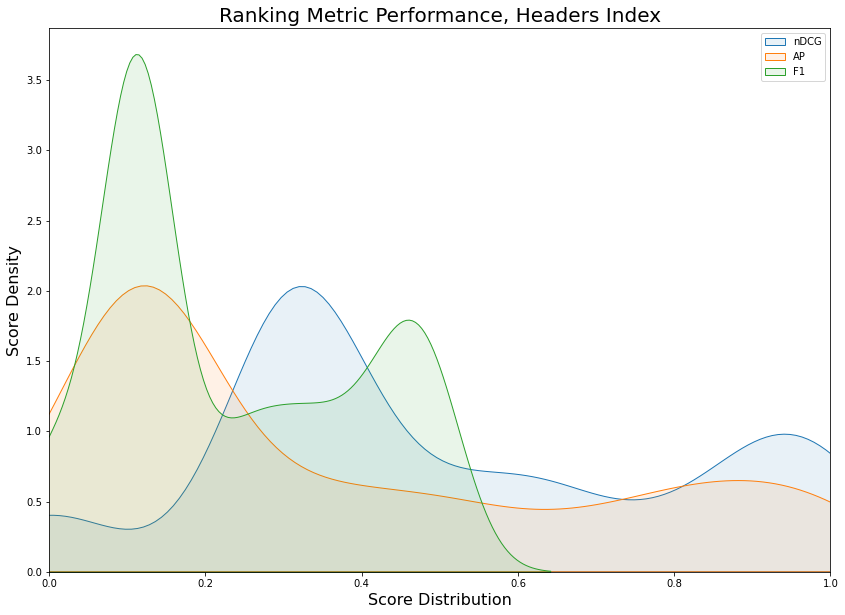

In [73]:
plt.figure(figsize = (14,10))

sns.kdeplot(Model_eval.nDCG, alpha=.1, shade=True, label='nDCG')
sns.kdeplot(Model_eval.AP, alpha=.1, shade=True,label='AP')
sns.kdeplot(Model_eval.F1,  alpha=.1, shade=True,label='F1')
plt.legend()
plt.title('Ranking Metric Performance, Headers Index', fontsize=20)
plt.xlabel('Score Distribution', fontsize=16)
plt.ylabel('Score Density', fontsize=16)
plt.xlim(0,1);

## Hybrid Scoring

In [94]:
CG = {}
DCG = {}
iDCG = {}
nDCG = {}
AP = {}
F_1 = {}
MAP = 0
count = 0
for (i,(k,j)) in zip(truth_dict.values(),hybrid_results_json.items()):
    CG[k] = Cummulative_gain(i,j)
    DCG[k] = Discounted_Cummulative_gain(i,j)
    iDCG[k] = Ideal_discounted_cummulative_gain(i,j)
    nDCG[k] = nDiscounted_Cummulative_gain(i,j)
    AP[k] = average_precision(i,j)
    F_1[k] = F_1_score(i,j)
    count +=1
    MAP +=AP[k]
Model_eval2 = pd.DataFrame(data=[CG, DCG, iDCG, nDCG, AP, F_1])
MAP/count

0.39891981986504665

In [95]:
Model_eval2 = Model_eval2.transpose().rename({0:'CG',1:'DCG',2:'iDCG',3:'nDCG',4:'AP',5:'F1'}, axis=1)
Model_eval2

,CG,DCG,iDCG,nDCG,AP,F1
0002,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
0003,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
0004,1.0,0.430677,1.000000,0.430633,0.249975,0.199984
0005,1.0,0.500000,1.000000,0.499950,0.333300,0.249981
0006,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
0465,4.0,2.394940,2.561606,0.934900,0.830336,0.453652
0466,1.0,0.630930,1.000000,0.630867,0.499950,0.333311
0467,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
0468,1.0,0.500000,1.000000,0.499950,0.333300,0.249981


In [96]:
Mean_scores2 = Model_eval2.mean()
Mean_scores2

CG      1.322650
DCG     0.755653
iDCG    1.116827
nDCG    0.520771
AP      0.398920
F1      0.252512
dtype: float64

In [105]:
mean_df = pd.DataFrame(data=[Mean_scores, Mean_scores2])
mean_df=mean_df.rename({0:'headers',1:'hybrid'},axis=0)
mean_df

,CG,DCG,iDCG,nDCG,AP,F1
headers,1.891026,0.930398,1.403936,0.507472,0.367243,0.230918
hybrid,1.322650,0.755653,1.116827,0.520771,0.398920,0.252512


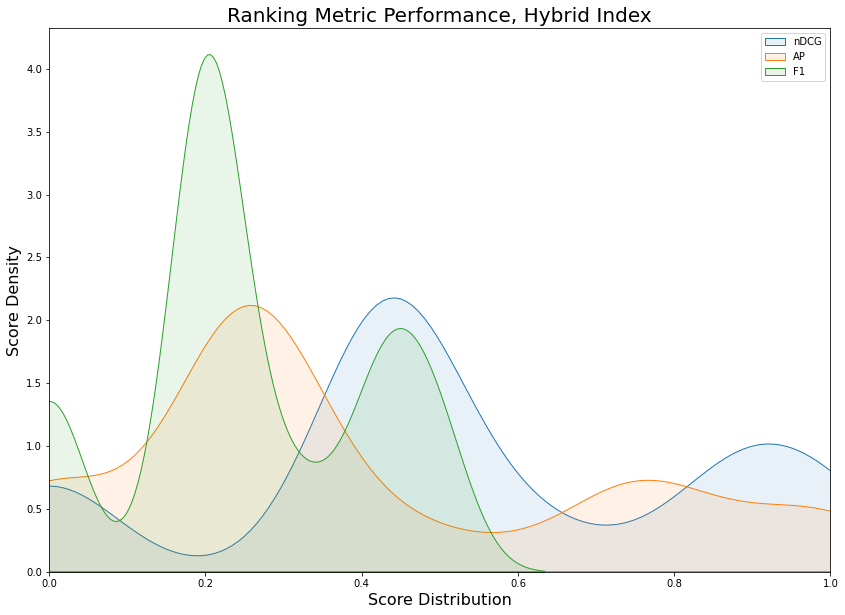

In [97]:
plt.figure(figsize = (14,10))

sns.kdeplot(Model_eval2.nDCG, alpha=.1, shade=True, label='nDCG')
sns.kdeplot(Model_eval2.AP, alpha=.1, shade=True, label='AP')
sns.kdeplot(Model_eval2.F1,  alpha=.1, shade=True, label='F1')
plt.legend()
plt.title('Ranking Metric Performance, Hybrid Index', fontsize=20)
plt.xlabel('Score Distribution', fontsize=16)
plt.ylabel('Score Density', fontsize=16)
plt.xlim(0,1);